#Understanding the Objective
###The goal is to predict whether the salary for data-related positions, based on location, company reviews, and job title, is satisfactory or not.


# import dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving df.csv to df (1).csv


# import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pickle


# read the data

In [ ]:
df = pd.read_csv("df.csv")

In [ ]:
df

,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),3.5,Hopper\n3.5,"New York, NY",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),4.5,Noom US\n4.5,"New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable
2,Data Science Manager,$111K-$181K (Glassdoor est.),-1.0,Decode_M,"New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable
3,Data Analyst,$111K-$181K (Glassdoor est.),3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable
4,"Director, Data Science",$111K-$181K (Glassdoor est.),3.4,United Entertainment Group\n3.4,"New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable
...,...,...,...,...,...,...,...,...,...,...,...
5887,Manufacturing Data Analyst Engineer,$42K - $76K (Glassdoor est.),3.6,Hose Master\n3.6,"Euclid, OH",201 to 500 Employees,1982,Company - Private,Electrical & Electronic Manufacturing,Manufacturing,Unknown / Non-Applicable
5888,Data Scientist,-1,4.9,Bluetree Network\n4.9,"Madison, WI",-1,-1,-1,-1,-1,-1
5889,Supply Chain Consultant - Data Scientist,-1,4.0,"Kimberly-Clark Corporation, LLC\n4.0","Neenah, WI",10000+ Employees,1872,Company - Public,Consumer Products Manufacturing,Manufacturing,$10+ billion (USD)
5890,Data Science Engineer,-1,4.0,AE Business Solutions\n4.0,"Madison, WI",51 to 200 Employees,1949,Company - Private,Computer Hardware & Software,Information Technology,$25 to $50 million (USD)


# Data Understanding
A few quick things come to mind looking at the above data:

1. Job titles can be categorized based on the words they contain such as "director", "data analyst", ...
2. Minimum and maximum salaries can be extracted from the salary estimate column and then averaged to create a new average salary column which will be our response variable
3. Company names should not matter much
4. The state where each position is located can be extracted from the location column
5. Because there are too many unknowns in the Revenue column, we will not use that column

#Assess data

In this section, we will check the raw data and get an understanding of what kind of data we are dealing with.





In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5892 entries, 0 to 5891
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          5892 non-null   object 
 1   Salary Estimate    5892 non-null   object 
 2   Rating             5892 non-null   float64
 3   Company Name       5892 non-null   object 
 4   Location           5892 non-null   object 
 5   Size               5892 non-null   object 
 6   Founded            5892 non-null   object 
 7   Type of ownership  5892 non-null   object 
 8   Industry           5892 non-null   object 
 9   Sector             5892 non-null   object 
 10  Revenue            5892 non-null   object 
dtypes: float64(1), object(10)
memory usage: 506.5+ KB


#Clean Data

*  Created minimum and maximum salary columns for the positions and parsed the
corresponding values out of the raw data

*   Created average salary column


* Extracted the state where each position is located. Created a state column

* Title column was created to show the different categories for the posted roles such as data engineer, deep learning, analyst, ...







In [ ]:
df = df[~df['Salary Estimate'].str.contains("Per Hour")]

In [ ]:
df = df[df['Salary Estimate']!= "-1"]

In [ ]:
#remove k and $
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.replace("$" , " "))
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.replace("K", " "))

In [ ]:
#split it
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.split())
df['Min_salary'] = df['Salary Estimate'].apply(lambda x: x[0])
df['Max_salary'] = df['Salary Estimate'].apply(lambda x: x[2])

In [ ]:
  # Cast Min_salary and Max_salary to int and get the avrage salary
df['Min_salary'] = df['Min_salary'].apply(lambda x:int(x))
df['Max_salary']=df['Max_salary'].astype(int)
df['Average_salary'] = (df.Min_salary + df.Max_salary)/2

In [ ]:
# State: what state is the job in
df["State"] = df['Location'].apply(lambda x: x.split()[-1])
df = df[df.State != "Kingdom"]

In [ ]:
df.head(2)

,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,Min_salary,Max_salary,Average_salary,State
0,Senior Data Scientist,"[111, -, 181, (Glassdoor, est.)]",3.5,Hopper\n3.5,"New York, NY",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,111,181,146.0,NY
1,"Data Scientist, Product Analytics","[111, -, 181, (Glassdoor, est.)]",4.5,Noom US\n4.5,"New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,111,181,146.0,NY


In [ ]:
def title_organizer(x):
        """
        This function organizes the job title
        """
        x = x.lower()
        if ('data scientist' in x) or ('data science' in x) :
            return 'data scientist'
        elif 'data engineer' in x:
            return 'data engineer'
        elif 'deep learning' in x:
            return 'deep learning engineer'
        elif 'machine learning' in x:
            return 'machine learning engineer'
        elif 'director' in x:
            return 'director'
        elif 'manager' in x:
            return 'manager'
        elif 'analyst' in x:
            return 'analyst'
        elif 'researcher' in x:
            return 'researcher'
        else:
            return 'other'

In [ ]:
df['Job Title']= df['Job Title'].apply(title_organizer)

In [ ]:
df['Job Title'].value_counts()

Job Title
data scientist               1992
analyst                      1178
other                        1160
data engineer                 858
machine learning engineer     177
manager                        76
researcher                     33
director                       19
deep learning engineer          3
Name: count, dtype: int64

In [ ]:
df = df[df["Rating"] != -1.0]

In [ ]:
cleaned_df = df[['Job Title', 'Rating', 'Average_salary', 'State']]

In [ ]:
cleaned_df

,Job Title,Rating,Average_salary,State
0,data scientist,3.5,146.0,NY
1,data scientist,4.5,146.0,NY
3,analyst,3.4,146.0,NJ
4,data scientist,3.4,146.0,NY
5,data scientist,2.9,146.0,NY
...,...,...,...,...
5881,other,3.2,51.0,OH
5882,other,4.2,68.0,OH
5883,other,4.0,89.5,OH
5886,analyst,4.0,89.0,OH


#Exploratory Data Analysis (EDA)


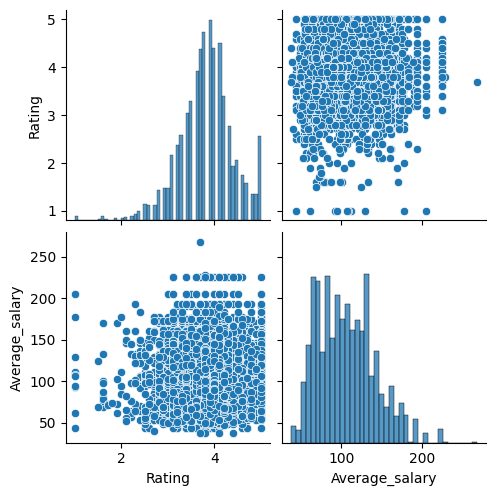

In [ ]:
sns.pairplot(cleaned_df)

<ipython-input-66-eadffa3c6bac>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "Job Title" , data = cleaned_df, palette = colors, edgecolor = "black",
<ipython-input-66-eadffa3c6bac>:7: UserWarning: The palette list has more values (12) than needed (9), which may not be intended.
  sns.countplot(x = "Job Title" , data = cleaned_df, palette = colors, edgecolor = "black",
<ipython-input-66-eadffa3c6bac>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "State", data = cleaned_df, palette = colors, edgecolor = "black",
<ipython-input-66-eadffa3c6bac>:14: UserWarning: 
The palette list has fewer values (12) than needed (23) and will cycle, which may produce an uninterpretable plo

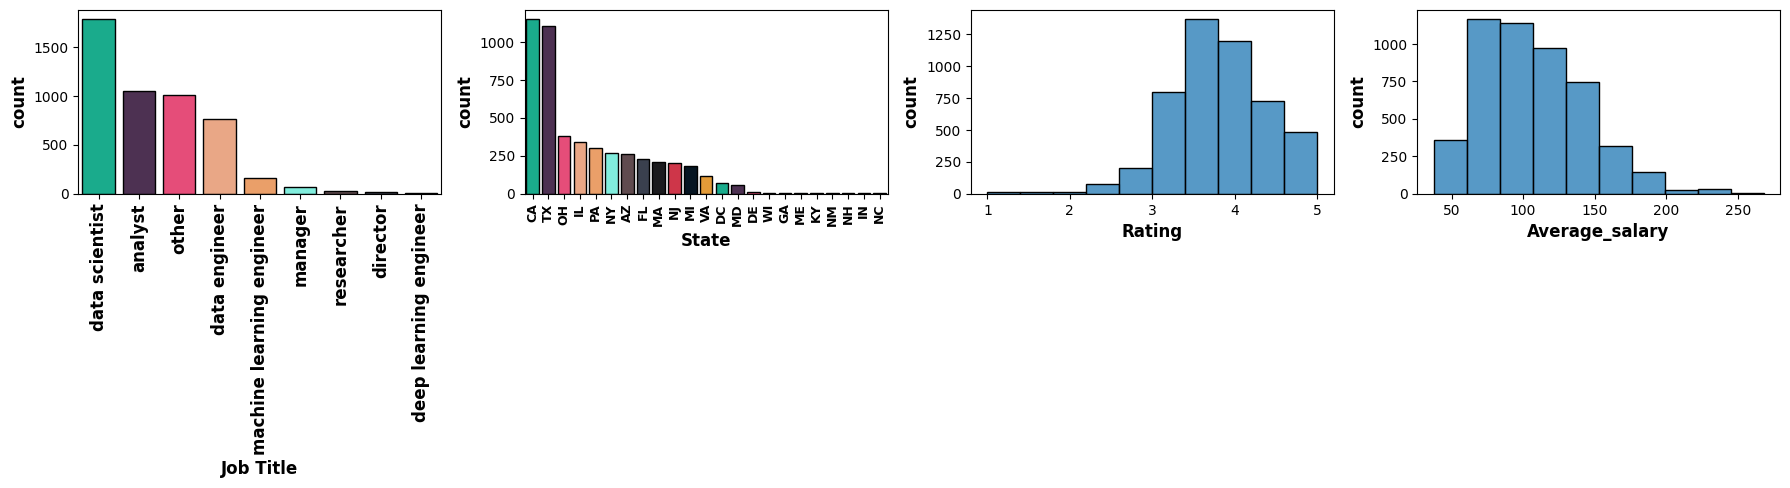

In [ ]:


colors = ['#02c39a', '#512b58', '#fe346e', '#faa275', '#ff9b54', '#6fffe9', '#63474d',
          '#373f51', '#1b1b1e', '#e71d36', '#011627', '#ff9f1c']

fig,ax = plt.subplots(nrows=1, ncols=4 , figsize = (18,5))

plt.subplot(1,4,1)
sns.countplot(x = "Job Title" , data = cleaned_df, palette = colors, edgecolor = "black",
              order = cleaned_df["Job Title"].value_counts().index, width = 0.8)
plt.xticks(rotation =90, fontsize = 12, fontweight = "bold")
plt.xlabel("Job Title",fontsize = 12, fontweight = "bold")
plt.ylabel("count",fontsize = 12, fontweight = "bold")

plt.subplot(1,4,2)
sns.countplot(x = "State", data = cleaned_df, palette = colors, edgecolor = "black",
              order = cleaned_df['State'].value_counts().index, width = 0.8)
plt.xticks(rotation =90, fontsize = 9, fontweight = "bold")
plt.xlabel("State",fontsize = 12, fontweight = "bold")
plt.ylabel("count",fontsize = 12, fontweight = "bold")

ax3 = plt.subplot(1,4,3)
sns.histplot(x = "Rating", data = cleaned_df, bins = 10, ax = ax3)
plt.xlabel("Rating",fontsize = 12, fontweight = "bold")
plt.ylabel("count",fontsize = 12, fontweight = "bold")

ax4 = plt.subplot(1,4,4)
sns.histplot(x = "Average_salary", data = cleaned_df, bins = 10, ax = ax4)
plt.xlabel("Average_salary",fontsize = 12, fontweight = "bold")
plt.ylabel("count",fontsize = 12, fontweight = "bold")

plt.tight_layout(h_pad= 5)
plt.show()


In [ ]:
cleaned_df.describe()

,Rating,Average_salary
count,4891.000000,4891.000000
mean,3.817011,106.082192
std,0.577004,35.749097
min,1.000000,37.500000
25%,3.500000,77.500000
50%,3.800000,102.000000
75%,4.100000,130.000000
max,5.000000,268.000000


<Axes: xlabel='Rating'>

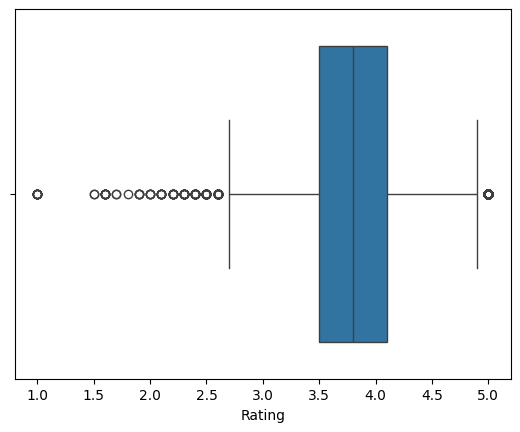

In [ ]:
sns.boxplot(cleaned_df, x = "Rating")

<Axes: xlabel='Rating', ylabel='Average_salary'>

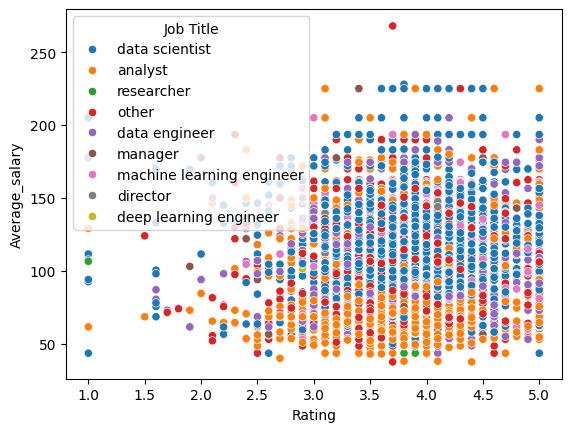

In [ ]:
sns.scatterplot(x='Rating', y='Average_salary', data= cleaned_df, hue= "Job Title")

In [ ]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4891 entries, 0 to 5887
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Job Title       4891 non-null   object 
 1   Rating          4891 non-null   float64
 2   Average_salary  4891 non-null   float64
 3   State           4891 non-null   object 
dtypes: float64(2), object(2)
memory usage: 191.1+ KB


# Feature Engineering

In [ ]:
preprocessed_df = pd.get_dummies(cleaned_df, columns=["Job Title","State" ],dtype=int)

In [ ]:
preprocessed_df

,Rating,Average_salary,Job Title_analyst,Job Title_data engineer,Job Title_data scientist,Job Title_deep learning engineer,Job Title_director,Job Title_machine learning engineer,Job Title_manager,Job Title_other,...,State_NC,State_NH,State_NJ,State_NM,State_NY,State_OH,State_PA,State_TX,State_VA,State_WI
0,3.5,146.0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,4.5,146.0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,3.4,146.0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3.4,146.0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,2.9,146.0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5881,3.2,51.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
5882,4.2,68.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
5883,4.0,89.5,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
5886,4.0,89.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
preprocessed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4891 entries, 0 to 5887
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Rating                               4891 non-null   float64
 1   Average_salary                       4891 non-null   float64
 2   Job Title_analyst                    4891 non-null   int64  
 3   Job Title_data engineer              4891 non-null   int64  
 4   Job Title_data scientist             4891 non-null   int64  
 5   Job Title_deep learning engineer     4891 non-null   int64  
 6   Job Title_director                   4891 non-null   int64  
 7   Job Title_machine learning engineer  4891 non-null   int64  
 8   Job Title_manager                    4891 non-null   int64  
 9   Job Title_other                      4891 non-null   int64  
 10  Job Title_researcher                 4891 non-null   int64  
 11  State_AZ                           

In [ ]:
preprocessed_df['Average_salary'].median()

102.0

In [ ]:
def sat (x):
  if x>= 102.0:
    return (1)
  else :
    return (0)

In [ ]:
preprocessed_df["Satisfaction"] = preprocessed_df["Average_salary"].apply(sat)

In [ ]:
preprocessed_df[["Satisfaction", "Average_salary"]]

,Satisfaction,Average_salary
0,1,146.0
1,1,146.0
3,1,146.0
4,1,146.0
5,1,146.0
...,...,...
5881,0,51.0
5882,0,68.0
5883,0,89.5
5886,0,89.0


# Modeling

In [ ]:
x = preprocessed_df.drop(columns = ["Average_salary", "Satisfaction"])
y = preprocessed_df["Satisfaction"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,
                                                    random_state = 101)

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
prediction = logreg.predict(x_test)

In [ ]:
prediction

array([0, 1, 0, ..., 0, 1, 0])

In [ ]:
y_test

4607    0
3136    1
2694    0
4633    0
4490    1
       ..
5366    0
2080    0
3348    0
1996    0
4704    1
Name: Satisfaction, Length: 1468, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, prediction)

array([[518, 204],
       [230, 516]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.69      0.72      0.70       722
           1       0.72      0.69      0.70       746

    accuracy                           0.70      1468
   macro avg       0.70      0.70      0.70      1468
weighted avg       0.70      0.70      0.70      1468



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

0.7043596730245232

# save the model

In [ ]:
pickle.dump(logreg, open("SalarySatisfaction_Estimater.pkl", "wb"))